In [4]:
# The topic of my research project is investigating the morphology of the 
# stellar remnant of the Milky Way + M31 major merger.

# Specifically, I will investigate the question of if the 3D structure of 
# the remnant is a spheroid or if it has some elongation or triaxiality, and
# how this shape changes as a function of radius.

# In this second attempt at the code, I will attempt to fit an ellipse to
# the remnant for multiple radii, extract the ellipse parameters from the fit in 3 different
# 2D projections of the remnant for snap number 595, and average them to
# estimate the 3D shape of the ellipse

In [284]:
# import modules and previously made code

# general modules for 
import numpy as np # math
import matplotlib.pyplot as plt # plotting
import astropy.units as u # units
from matplotlib.colors import LogNorm # histograms
from mpl_toolkits.axes_grid1 import make_axes_locatable # for colorbar placement
# for elliptical isophote fitting
from photutils.isophote import EllipseGeometry
from photutils.isophote import Ellipse
# previously made code for
from CenterOfMass2 import CenterOfMass # finding center of mass (from HW6)
# from ContourFitting import density_contour # for plotting density contours (from Lab7 - modified)
from RotateFrame import RotateFrame # for aligning the galaxy's angular momentum with the z axis (Lab 7)
from GalaxyMass import ComponentMass # for finding the total disk and bulge masses

In [6]:
# make function to calculate COM of two COMs
def COM_of_COMs(COMvec1, COMvec2, M1, M2):
    ''' 
    Calculates the center of mass position or 
    velocity for two given centers of mass and
    the associated total masses.

    Parameters
    ----------
        COMvec1, COMvec2: `numpy array-like`
            the vectors associated with each
            center of mass respectively
        M1, M2: `astropy quantity`
            the masses associated with each
            center of mass (Msun)
    
    Returns
    -------
        COMvec_tot: `numpy array-like`
            the vector for the total
            center of mass
    '''
    # calculate total center of mass vector
    denom = M1+M2
    num = COMvec1*M1 + COMvec2*M2
    COMvec_tot = num / denom

    return COMvec_tot

In [7]:
# NOTE: WILL TURN THIS INTO A CLASS MOST LIKELY
# find the disk+bulge COM of each galaxy individually
# choose voldec=2 for COM position determination for
# consistency with previous HWs
# 2 = disk, 3 = bulge

# use high-resolution snapshots 2 Gyr post-MW-M31 merger (snap number 595)

# MW first
# disk COM position, velocity & mass
MW_COM_disk = CenterOfMass('MW_595.txt', 2)
MW_COM_disk_p = MW_COM_disk.COM_P(2)
MW_COM_disk_v = MW_COM_disk.COM_V(MW_COM_disk_p[0], MW_COM_disk_p[1],
                                  MW_COM_disk_p[2])
MW_disk_M = ComponentMass('MW_595.txt', 'Disk')*1e12 # put it in units of Msun

# bulge COM position, velocity & mass
MW_COM_bulge = CenterOfMass('MW_595.txt', 3)
MW_COM_bulge_p = MW_COM_bulge.COM_P(2)
MW_COM_bulge_v = MW_COM_bulge.COM_V(MW_COM_bulge_p[0], MW_COM_bulge_p[1],
                                    MW_COM_bulge_p[2])
MW_bulge_M = ComponentMass('MW_595.txt', 'Bulge')*1e12

# calculate COM position & velocity of disk & bulge COMs & total baryonic mass
MW_COM_p = COM_of_COMs(MW_COM_disk_p, MW_COM_bulge_p, MW_disk_M, MW_bulge_M)
MW_COM_v = COM_of_COMs(MW_COM_disk_v, MW_COM_bulge_v, MW_disk_M, MW_bulge_M)
MW_M = MW_disk_M + MW_bulge_M

In [8]:
# look at results
print(f'MW COM position: {MW_COM_p}')
print(f'MW COM velocity: {MW_COM_v}')
print(f'MW total mass: {MW_M:.2e}')

MW COM position: [100.63176471  88.87941176  75.30117647] kpc
MW COM velocity: [ 33.95941176 -24.80058824  31.30941176] km / s
MW total mass: 8.50e+10 solMass


In [9]:
# now M31
# disk COM position, velocity & mass
M31_COM_disk = CenterOfMass('M31_595.txt', 2)
M31_COM_disk_p = M31_COM_disk.COM_P(2)
M31_COM_disk_v = M31_COM_disk.COM_V(M31_COM_disk_p[0], M31_COM_disk_p[1],
                                  M31_COM_disk_p[2])
M31_disk_M = ComponentMass('M31_595.txt', 'Disk')*1e12 # put it in units of Msun

# bulge COM position, velocity & mass
M31_COM_bulge = CenterOfMass('M31_595.txt', 3)
M31_COM_bulge_p = M31_COM_bulge.COM_P(2)
M31_COM_bulge_v = M31_COM_bulge.COM_V(M31_COM_bulge_p[0], M31_COM_bulge_p[1],
                                    M31_COM_bulge_p[2])
M31_bulge_M = ComponentMass('M31_595.txt', 'Bulge')*1e12

# calculate COM position & velocity of disk & bulge COMs
M31_COM_p = COM_of_COMs(M31_COM_disk_p, M31_COM_bulge_p, M31_disk_M, M31_bulge_M)
M31_COM_v = COM_of_COMs(M31_COM_disk_v, M31_COM_bulge_v, M31_disk_M, M31_bulge_M)
M31_M = M31_disk_M + M31_bulge_M

In [10]:
print(f'M31 COM position: {M31_COM_p}')
print(f'M31 COM velocity: {M31_COM_v}')
print(f'M31 total mass: {M31_M:.2e}')

M31 COM position: [99.92381295 89.25985612 74.3842446 ] kpc
M31 COM velocity: [ 35.3452518  -27.07935252  31.92273381] km / s
M31 total mass: 1.39e+11 solMass


In [11]:
# now calculate COM position & velocity of whole remnant
rem_COM_p = COM_of_COMs(MW_COM_p, M31_COM_p, MW_M, M31_M)
rem_COM_v = COM_of_COMs(MW_COM_v, M31_COM_v, MW_M, M31_M)

print(f'Remnant COM position: {rem_COM_p}')
print(f'Remnant COM velocity: {rem_COM_v}')
# it's closer to the position and velocity of M31, which makes sense
# although MW and M31 were already very close to each other (again, makes sense)

Remnant COM position: [100.19245536  89.11549107  74.7321875 ] kpc
Remnant COM velocity: [ 34.819375   -26.21464286  31.69      ] km / s


In [12]:
# "make" the remnant 

# concatenate MW and M31 bulge & disk arrays into one
# for position
# x, y, z individually for now
rem_x = np.concatenate((MW_COM_disk.x, MW_COM_bulge.x, 
                        M31_COM_disk.x, M31_COM_bulge.x),
                        axis=0)
rem_y = np.concatenate((MW_COM_disk.y, MW_COM_bulge.y, 
                        M31_COM_disk.y, M31_COM_bulge.y),
                        axis=0)
rem_z = np.concatenate((MW_COM_disk.z, MW_COM_bulge.z, 
                        M31_COM_disk.z, M31_COM_bulge.z),
                        axis=0)

# now subtract COM position from remnant position arrays
rem_x_rel = rem_x - rem_COM_p[0].value
rem_y_rel = rem_y - rem_COM_p[0].value
rem_z_rel = rem_z - rem_COM_p[0].value

# and get final remnant position array relative to its COM
rem_p_rel = np.array([rem_x_rel, rem_y_rel, rem_z_rel])*u.kpc

In [13]:
# do the same for velocity
# get individual vx, vy, viz
rem_vx = np.concatenate((MW_COM_disk.vx, MW_COM_bulge.vx, 
                        M31_COM_disk.vx, M31_COM_bulge.vx),
                        axis=0)
rem_vy = np.concatenate((MW_COM_disk.vy, MW_COM_bulge.vy, 
                        M31_COM_disk.vy, M31_COM_bulge.vy),
                        axis=0)
rem_vz = np.concatenate((MW_COM_disk.vz, MW_COM_bulge.vz, 
                        M31_COM_disk.vz, M31_COM_bulge.vz),
                        axis=0)

# get velocity components relative to COM
rem_vx_rel = rem_vx - rem_COM_v[0].value
rem_vy_rel = rem_vy - rem_COM_v[0].value
rem_vz_rel = rem_vz - rem_COM_v[0].value

# get total velocity array
rem_v_rel = np.array([rem_vx_rel, rem_vy_rel, rem_vz_rel])*u.km/u.s

In [14]:
# align the remnant's angular momentum with the z-axis
# this will allow me to look at it "edge-on" and "face-on"
rem_p, rem_v = RotateFrame(rem_p_rel.T, rem_v_rel.T)

In [136]:
# make 2d particle density histograms of each projection
# xy, xz, and yz
xyhist = np.histogram2d(rem_p[:,0].value, rem_p[:,1].value, 
              bins=1000)
xzhist = np.histogram2d(rem_p[:,0].value, rem_p[:,2].value, 
              bins=1000)
yzhist = np.histogram2d(rem_p[:,1].value, rem_p[:,2].value, 
              bins=1000)

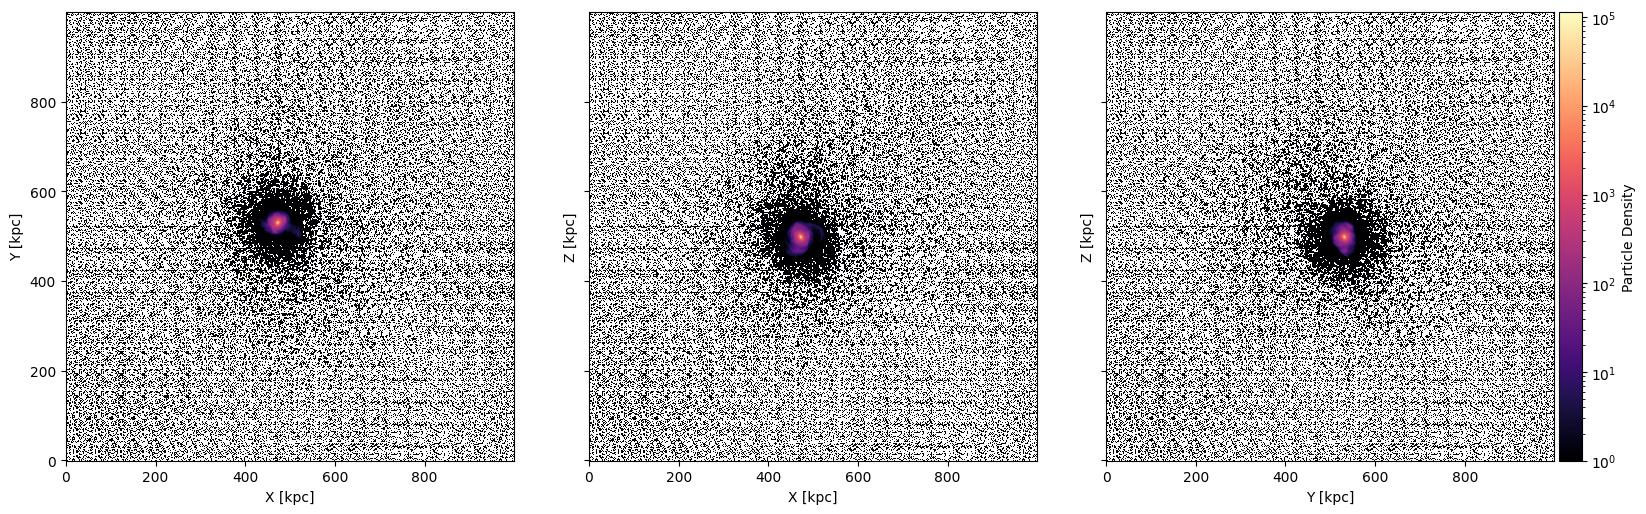

In [137]:
# plot 2D projections onto the 3 planes

fig, axs = plt.subplots(1,3, figsize=(16,5), sharex=True, 
                        sharey=True, layout='constrained')

# get a common vmin and vmax for the histograms
# so the same colorbar works for all 3
# get maximum and minimum particle densities
# concatenate all the histograms for this real quick
tempdens = np.concatenate((xyhist[0], xzhist[0], yzhist[0]))
vmax = np.max(tempdens)
# have to find minimum NONZERO density for vmin
# because LogNorm() doesn't take arguments <= 0
vmin = np.min(tempdens[np.nonzero(tempdens)])

# actually plot everything
# xy
# particle density histogram
# transpose it so imshow shows it correctly
axs[0].imshow(xyhist[0].T, norm=LogNorm(vmin=vmin, vmax=vmax), 
              cmap='magma', origin='lower')
# axis labels
axs[0].set_xlabel('X [kpc]')
axs[0].set_ylabel('Y [kpc]')

# xz
# particle density histogram
axs[1].imshow(xzhist[0].T, norm=LogNorm(vmin=vmin, vmax=vmax), 
              cmap='magma', origin='lower')
# axis labels
axs[1].set_xlabel('X [kpc]')
axs[1].set_ylabel('Z [kpc]')

# yz
# particle density histogram
# save this 2d histogram for making the colorbar
im = axs[2].imshow(yzhist[0].T, norm=LogNorm(vmin=vmin, vmax=vmax), 
              cmap='magma', origin='lower')
# axis labels
axs[2].set_xlabel('Y [kpc]')
axs[2].set_ylabel('Z [kpc]')

# make a common colorbar for all 3 plots
# make an "axis" for the new colorbar
divider = make_axes_locatable(axs[2])
cax = divider.append_axes("right", size="5%", pad=0.05)
# add colorbar
fig.colorbar(im, cax=cax, label='Particle Density')

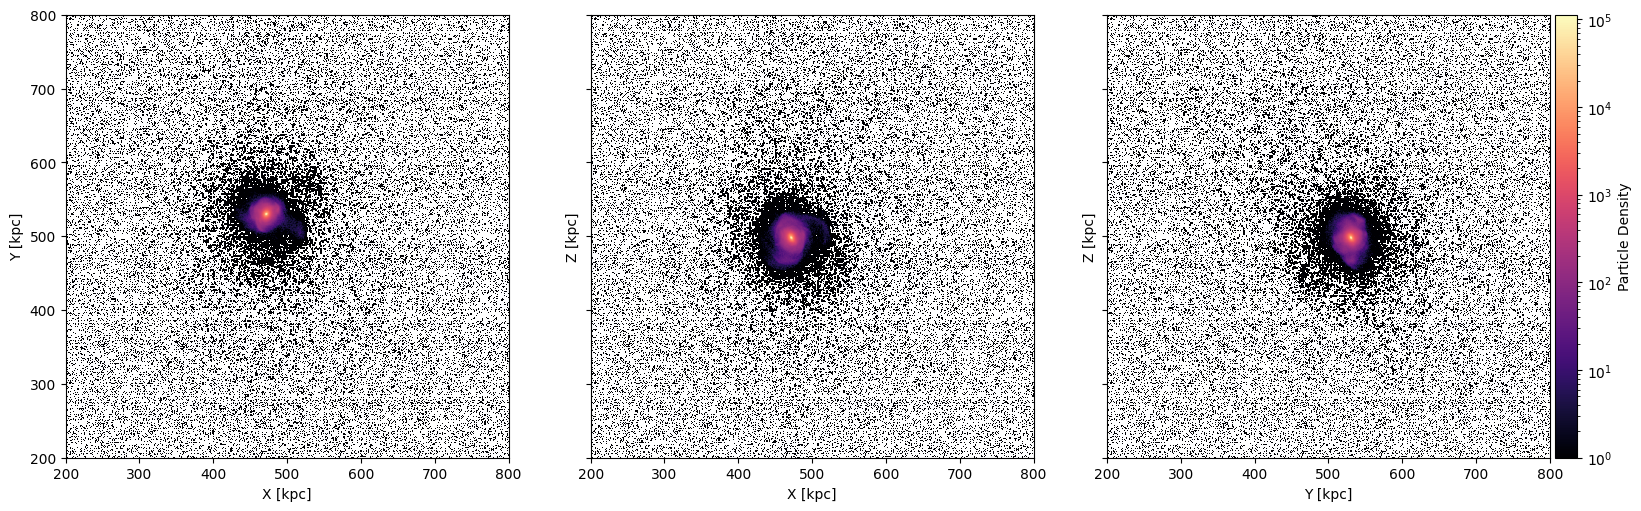

In [139]:
# same plot, but zoom in more

fig, axs = plt.subplots(1,3, figsize=(16,5), sharex=True, 
                        sharey=True, layout='constrained')

# xy
# particle density histogram
axs[0].imshow(xyhist[0].T, norm=LogNorm(vmin=vmin, vmax=vmax), 
              cmap='magma', origin='lower')
# axis labels
axs[0].set_xlabel('X [kpc]')
axs[0].set_ylabel('Y [kpc]')

# xz
# particle density histogram
axs[1].imshow(xzhist[0].T, norm=LogNorm(vmin=vmin, vmax=vmax), 
              cmap='magma', origin='lower')
# axis labels
axs[1].set_xlabel('X [kpc]')
axs[1].set_ylabel('Z [kpc]')

# yz
# particle density histogram
# save this 2d histogram for making the colorbar
im = axs[2].imshow(yzhist[0].T, norm=LogNorm(vmin=vmin, vmax=vmax), 
              cmap='magma', origin='lower')
# axis labels
axs[2].set_xlabel('Y [kpc]')
axs[2].set_ylabel('Z [kpc]')

# set global axis limits
fig.gca().set_xlim(200, 800)
fig.gca().set_ylim(200, 800)

# make a common colorbar for all 3 plots
# make an "axis" for the new colorbar
divider = make_axes_locatable(axs[2])
cax = divider.append_axes("right", size="5%", pad=0.05)
# add colorbar
fig.colorbar(im, cax=cax, label='Particle Density')

In [140]:
# I don't like that the galaxy isn't centered at (0,0) anymore
# maybe switch back to using ax.hist2d?

In [ ]:
# NOTE: I am no longer using this function, but I felt 
# bad deleting it after working on it really hard so
# I've commented it out until I eventually delete it
# for the final submission


# # write function to fit ellipse using least-squares method
# # and extract the relevant geometrical parameters:
# # axes (a & b), tilt from horizontal (theta), center (x0, y0)

# def fit_ellipse_lstsq(xpos, ypos):
#     '''
#     Fits a generic ellipse to the the given x & y positions
#     using the least-squares methods and extracts the geometrical 
#     parameters of the ellipse from the result. Ellipse is of the
#     form: 
#     alpha*x^2 + beta*xy + gamma*y^2 + eta*x + kappa*y + mu = 0
    
#     Parameters
#     ----------
#         xpos: `numpy array`
#             x-axis positions of the points to fit
#         ypos: `numpy array`
#             y-axis positions of the points to fit

#     Returns
#     -------
#         a: `float`
#             the semimajor axis
#         b: `float`
#             the semiminor axis
#         x0: `float`
#             the x-coordinate of the center
#         y0: `float`
#             the y-coordinate of the center
#         theta: `float`
#             the tilt angle with respect to
#             the x-axis
#     '''

#     # solve least squares problem: minimizing |Av - b|^2 
#     A = np.stack([xpos**2, xpos*ypos, ypos**2, xpos, ypos]).T
#     b = np.ones_like(xpos)
#     v = np.linalg.lstsq(A, b)[0].squeeze() # parameters of fit ellipse

#     # extract ellipse fit parameters
#     alpha, beta, gamma, eta, kappa = v[0], v[1], v[2], v[3], v[4]

#     # get geometrical parameters from fit
#     # axes
#     t1 = beta**2 - 4*alpha*gamma
#     t2 = alpha*kappa**2 + gamma*eta**2 - beta*eta*kappa - t1
#     t3 = np.sqrt((alpha - gamma)**2 + beta**2)
#     t4 = alpha + gamma
    
#     a = - np.sqrt(2*t2*(t4 + t3))/t1
#     b = - np.sqrt(2*t2*(t4 - t3))/t1

#     # center coordinates
#     t6 = 2*gamma*eta - beta*kappa
#     t7 = 2*alpha*kappa - beta*eta

#     x0 = t6/t1
#     y0 = t7/t1

#     # tilt angle
#     theta = 0.5*np.arctan2(-beta, gamma-alpha)

#     return a, b, x0, y0, theta

In [154]:
# we're also going to try the isophote fitting method
# and see which one performs better
# (probably the isophotes, since they were made by professionals)
# based off code from ellipse_fitting Jupyter notebook by Himansh

def fit_ellipse_isophote(hist, sma_base, eps_base, pa_base):
    '''
    Fits elliptical isphotes to the given 2D  galaxy particle 
    density histogram using `photutils.isophote`.

    Parameters
    ----------
        hist: `numpy.histogram2d`
            2D particle density histogram
        sma_base: `float`
            starting point for the semimajor
            axis fit
        eps_base: `float`
            starting point for the 
            ellipticity fit
        pa_base: `float`
            starting point for the position
            angle fit

    Returns
    -------
        ell_list: `photutils.isophote.IsophoteList`
            the elliptical isophote fits for the
            given galaxy.
    '''

    # unpack particle density histogram & x & y bin edges
    dens, xedges, yedges = hist[0], hist[1], hist[2]
    # get x & y bin sizes
    xbinsize = xedges[1] - xedges[0]
    ybinsize = yedges[1] - yedges[0]

    # get pixel coordinates of center
    center_x_pix = -xedges[0]/xbinsize
    center_y_pix = -yedges[0]/ybinsize

    # define base ellipse geometry for fitting
    # sma is semimajor axis, eps is ellipticity, pa is position angle
    ell_geom = EllipseGeometry(x0 = center_x_pix, y0 = center_y_pix,
                               sma=sma_base/xbinsize, eps=eps_base, 
                               pa=pa_base)
    # initialize the ellipse object for fitting
    # transpose the histogram to undo the transposition done by Ellipse
    ellipse_base = Ellipse(dens.T, ell_geom)
    # fit the ellipses
    ell_list = ellipse_base.fit_image()

    return ell_list


In [178]:
# define function to get and plot the closest elliptical
# isophotes to a given list of semimajor axes
# also based off code from ellipse_fitting Jupyter notebook by Himansh

def get_closest_ellipses(sma_arr, ell_list, ax, **kwargs):
    '''
    Finds the elliptical isophotes with semimajor axes closest 
    to those in the given array. 

    Parameters
    ----------
        sma_arr: `numpy.ndarray-like`
            the array of target semimajor
            axes
        ell_list: `photutils.isophote.IsophoteList`
            the elliptical isophote fits for the
            given galaxy
        ax: `matplotlib.axes.Axes`
            the axis (subplot) to place the plotted
            ellipses on 
        **kwargs:
            arguments for plotting the ellipses
            (color, linestyle, etc.) 

    Returns
    -------
        closest_ells: `list`
            list of the isophotes with semimajor
            axes closest to the targets
    '''

    closest_ells = []

    for sma in sma_arr:
        # get isophote with semi-major axis closest to the given one
        ellipse = ell_list.get_closest(sma)
        closest_ells.append(ellipse)
        # get x, y points associated with ellipse and plot them
        x_ell, y_ell = ellipse.sampled_coordinates()
        ax.plot(x_ell, y_ell, **kwargs)
    
    return closest_ells


In [ ]:
# define auxiliary function to help with morphological classification

def approx(n, m, tol):
    '''
    Determines if two quantities are
    approximately equal within some
    tolerance in terms of percentage.

    Parameters
    ----------
        n, m: `float`
            quantities to be compared
        tol: `float`
            the tolerance in percentage
            for being approximately 
            equal

    Returns
    -------
        approx_equal: `bool`
            whether inputs are
            approximately equal

    '''
    if np.abs(n-m)/n <= tol:
        approx_equal = True
    else:
        approx_equal = False

    return approx_equal

In [237]:
# write function to classify remnant morphology
# based on the lengths of the A, B, C axes

def morphology(ax_x, ax_y, ax_z, tol):
    '''
    Determines the shape of a 3D ellipsoid given 
    the lengths of its axes.

    Parameters
    ----------
        ax_x: `float`
            x-axis of the ellipse
        ax_y: `float`
            y-axis of the ellipse
        ax_z: `float`
            z-axis of the ellipse
        tol: `float`
            how close in percentage
            two axes need to be to
            be approximately equal
    
    Returns
    -------
        shape: `string`
            shape of the ellipse
            (spheroid, oblate, prolate, triaxial)
        q1, q2: `float`
            the axis ratios
        
    '''
    # get the max, min, and median of the axes
    axes = np.array([ax_x, ax_y, ax_z])
    A = np.max(axes)
    B = np.min(axes)
    C = np.median(axes)

    # get the two axis ratios q1 & q2
    q1 = B/A
    q2 = C/A

    # figure out the shape
    if approx(q1, q2, tol): # if q1 = q2, can be spheroid or prolate

        if approx(1, q1, tol) & approx(1, q2, tol): 
            shape = 'spheroid' # A = B = C -> 1 = q1 = q2
        
        elif (1>q1) & (1>q2): # A > B = C -> 1 > q1 = q2
            shape = 'prolate'

        else:
            # ideally one of the above two conditions should be met
            # if tol is small enough, but just in case
            shape = 'triaxial?'
    
    else:

        if approx(1, q1, tol):
            shape = 'oblate' # A = B > C -> 1 = q1 > q2

        else:
            shape = 'triaxial' # all axes are different, i.e A > B > C
                               # or 1 > q1 > q2
    return shape, q1, q2

In [155]:
# get elliptical fits for all the projections
xy_ellipses = fit_ellipse_isophote(xyhist, 50, 0, 0)
yz_ellipses = fit_ellipse_isophote(yzhist, 50, 0, 0)
xz_ellipses = fit_ellipse_isophote(xzhist, 50, 0, 0)

In [202]:
# define an array of semimajor axes of interest
# use a log scale because the galaxy's density changes 
# most closer to the center

# get bin size
binsize = xyhist[1][1] - xyhist[1][0]
# convert from kpc to bins 
sma_arr = np.logspace(1, 3, 50, base=10)/binsize

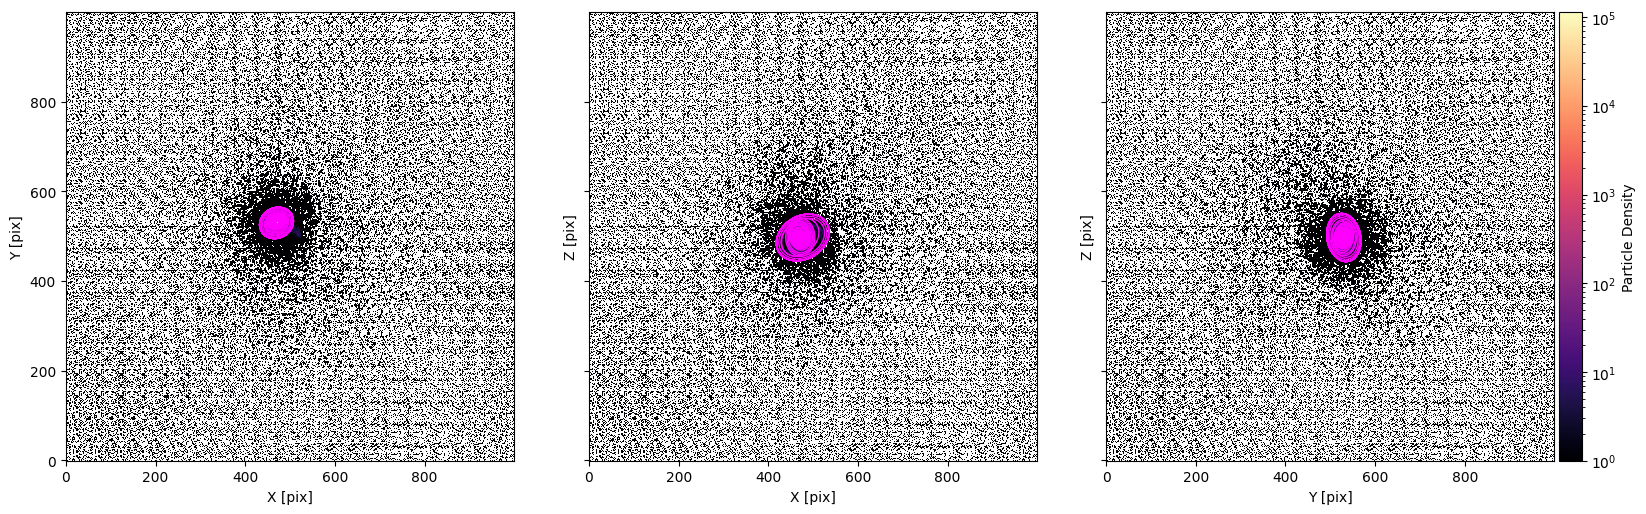

In [204]:
# get and plot best-fit ellipses to these semimajor axes

fig, axs = plt.subplots(1,3, figsize=(16,5), sharex=True, 
                        sharey=True, layout='constrained')

# define parameters for the ellipses
color = 'magenta'
lw = 1

# xy
# particle density histogram
axs[0].imshow(xyhist[0].T, norm=LogNorm(vmin=vmin, vmax=vmax), 
              cmap='magma', origin='lower')
# ellipses
xy_fitells = get_closest_ellipses(sma_arr, xy_ellipses, ax=axs[0], 
                                  color=color, linewidth=lw)

# axis labels
axs[0].set_xlabel('X [pix]')
axs[0].set_ylabel('Y [pix]')

# xz
# particle density histogram
axs[1].imshow(xzhist[0].T, norm=LogNorm(vmin=vmin, vmax=vmax), 
              cmap='magma', origin='lower')
# ellipses
xz_fitells = get_closest_ellipses(sma_arr, xz_ellipses, ax=axs[1], 
                                  color=color, linewidth=lw)
# axis labels
axs[1].set_xlabel('X [pix]')
axs[1].set_ylabel('Z [pix]')

# yz
# particle density histogram
# save this 2d histogram for making the colorbar
im = axs[2].imshow(yzhist[0].T, norm=LogNorm(vmin=vmin, vmax=vmax), 
              cmap='magma', origin='lower')
# ellipses
yz_fitells = get_closest_ellipses(sma_arr, yz_ellipses, ax=axs[2], 
                                  color=color, linewidth=lw)
# axis labels
axs[2].set_xlabel('Y [pix]')
axs[2].set_ylabel('Z [pix]')

# make a common colorbar for all 3 plots
# make an "axis" for the new colorbar
divider = make_axes_locatable(axs[2])
cax = divider.append_axes("right", size="5%", pad=0.05)
# add colorbar
fig.colorbar(im, cax=cax, label='Particle Density')

In [ ]:
# ellipses won't go out as far as I'd like...
# with the least squares + density contour method, I could get fits
# further out, they were just pretty bad

In [209]:
# define function to get all the semimajor axes, 
# semiminor axes, position angles, and ellipticities 
# for a projection to make my life easier

def get_geom_properties(ellfits):
    '''
    Gets the geometrical properties of all
    fitted ellipses in a projection.

    Parameters
    ----------
        ellfits: `list`
            the fitted ellipses
    
    Returns
    -------
        smaa_arr: `numpy.ndarray`
            the semimajor axes of
            the fitted ellipses
        smia_arr: `numpy.ndarray`
            the semiminor axes of
            the fitted ellipses
        pa_arr: `numpy.ndarray`
            the position angles of
            the fitted ellipses
        eps_arr: `numpy.ndarray`
            the ellipticities of
            the fitted ellipses
    '''

    n = len(ellfits)
    # storage arrays
    smaa_arr = np.zeros(n) # semimajor axis
    smia_arr = np.zeros(n) # semiminor axis
    pa_arr = np.zeros(n) # position angle
    eps_arr = np.zeros(n) # ellipticity

    # loop through all fitted ellipses
    for i in range(n):

        ellipse = ellfits[i]

        # get and save geometrical properties
        smaa_arr[i] = ellipse.sma
        pa_arr[i] = ellipse.pa
        eps_arr[i] = ellipse.eps
        # from eps = 1 - b/a:
        smia_arr[i] = ellipse.sma*(1-ellipse.eps) 

    return smaa_arr, smia_arr, pa_arr, eps_arr

In [211]:
# get semimajor axis, semiminor axis, position angle, 
# and ellipticity for each elliptical fit in each projection

# xy
xy_geom_params = np.array(get_geom_properties(xy_fitells))
# xz
xz_geom_params = np.array(get_geom_properties(xz_fitells))
# yz
yz_geom_params = np.array(get_geom_properties(yz_fitells))

In [212]:
# get binsizes for histograms so I can convert back to kpc when needed
xy_binsize = xyhist[1][1] - xyhist[1][0]
xz_binsize = xzhist[1][1] - xzhist[1][0]
yz_binsize = yzhist[1][1] - yzhist[1][0]

Text(0, 0.5, 'Ellipticity $\\epsilon$')

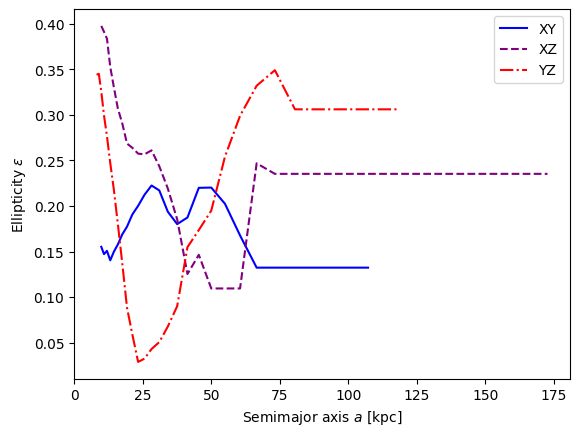

In [216]:
# plot ellipticity vs. semimajor axis for each projection
# convert semimajor axis back to kpc!

fig, ax = plt.subplots()

# xy
ax.plot(xy_geom_params[0]*xy_binsize, xy_geom_params[3], 
        c='b', label='XY')
# xz
ax.plot(xz_geom_params[0]*xz_binsize, xz_geom_params[3], 
        c='purple', linestyle='--', label='XZ')
# yz
ax.plot(yz_geom_params[0]*yz_binsize, yz_geom_params[3], 
        c='r', linestyle='-.', label='YZ')

ax.legend()

ax.set_xlabel(r'Semimajor axis $a$ [kpc]')
ax.set_ylabel(r'Ellipticity $\epsilon$')

# seems like after ~75 kpc fits just weren't being made anymore
# also generally the ellipticity of XY almost seems inversely
# related to the other two? And it's generally much closer
# to being circular. Interesting! Maybe we're looking at prolateness
# on the outside and oblateness/triaxiality on the inside?

In [227]:
# cut off where xy projection begins to flatten out
# so I'm comparing apples to apples

In [253]:
# get first index where semimajor axis hits ~75 kpc (38 pix)
idx = np.where(xy_geom_params[0]>38)[0][0]

# and trim the arrays accordingly
xy_geom_params = xy_geom_params[:,:idx+1]
xz_geom_params = xz_geom_params[:,:idx+1]
yz_geom_params = yz_geom_params[:,:idx+1]

In [256]:
# time to determine the 3D shapes!

In [257]:
def get_specific_axis_lengths(geom_params):
    '''
    Determines which of the ellipses' semimajor
    and semiminor axes is closest to each coordinate
    axis for a set of ellipse geometric parameters.

    Parameters
    ----------
        geom_params: `numpy.ndarray`
            the geometric parameters of the
            fitted ellipses.
    
    Outputs
    -------
        spec_axes: `numpy.ndarray`
            the axes sorted into columns
            depending on which coordinate 
            axis they're closest to
            (0 = horizontal, 1 = vertical)
            (ex: xy projection -> 0 = x, 1 = y)
    '''
    # semimajor and minor axes
    smaas, smias = geom_params[0], geom_params[1]
    # position angles of smaa from horizontal axis
    pas = geom_params[2]

    # to store the specific axes
    n = len(smaas)
    horiz, vert = np.zeros(n), np.zeros(n)

    # sort them using position angle
    for i in range(n):

        if pas[i] < np.pi/4: # if pa > pi/4, smaa closer to the horizontal
            horiz[i] = smaas[i]
            vert[i] = smias[i]

        else:
            horiz[i] = smias[i]
            vert[i] = smaas[i]

    spec_axes = np.array([horiz, vert])

    return spec_axes

In [258]:
# get specific axes for all projections
xy_spec_axes = get_specific_axis_lengths(xy_geom_params)
xz_spec_axes = get_specific_axis_lengths(xz_geom_params)
yz_spec_axes = get_specific_axis_lengths(yz_geom_params)

In [259]:
# define a function to get 3D axis lengths for the axes
def get_3D_axis_length(axlens, thetas, whichprojs):
    '''
    Calculates an average 3D axis length of an ellipsoid from its 
    projected fits onto 2 planes (e.g. the 3D x-axis
    from its xy and xz projections).

    Parameters
    ----------
        axlens: `numpy.ndarray-like`
            the 2D axis lengths
        thetas: `numpy.ndarray-like`
            the 2D position angles
        whichprojs: `list`
            which 2D axes are being averaged
            (e.g. ['xy', 'yz'])

    Returns
    -------
        len_ax: `float`
            the length of the 3D axis
    '''

    # so I put components in the right part of the vector
    coords_idxs = {'x':0, 'y':1, 'z':2}

    # for storing the vector forms of the 2D axes
    ax_vecs = np.zeros((2,3))

    for i in range(2):
        # get 2D axis vector components
        comp1 = axlens[i]*np.cos(thetas[i])
        comp2 = axlens[i]*np.sin(thetas[i])

        # figure out where to put them using the given
        # projections
        coord1, coord2 = whichprojs[i][0], whichprojs[i][1]
        idx1, idx2 = coords_idxs[coord1], coords_idxs[coord2]

        # make vectors
        ax_vecs[i,idx1] = comp1
        ax_vecs[i,idx2] = comp2
    
    # sum vector components 
    final_ax_vec = np.sum(ax_vecs, axis=0)
    # figure out which axis the two projections have in common
    common_comp = ''.join(set(whichprojs[0]).intersection(whichprojs[1]))
    common_idx = coords_idxs[common_comp]
    # then average that component to get the final 3D axis vector
    final_ax_vec[common_idx] = final_ax_vec[common_idx]/2

    # then get the magnitude of that vector
    len_ax = np.sqrt(np.sum(final_ax_vec**2))

    return len_ax

In [260]:
# get specific axis lengths of fitted ellipsoids
n = len(xy_geom_params[0])
x_axes, y_axes, z_axes = np.zeros(n), np.zeros(n), np.zeros(n)

# and shapes & axis ratios
shapes = []
axis_ratios = np.zeros((n,2)) # q1, q2

for i in range(n):

    # NOTE: for the vertical axis, add pi/2 to the angle!

    # find x-axis length from xy & xz
    x_ax = get_3D_axis_length([xy_spec_axes[0][i], xz_spec_axes[0][i]],
                              [xy_geom_params[3][i], xz_geom_params[3][i]],
                              ['xy', 'xz'])
    x_axes[i] = x_ax
    
    # find y-axis length from xy & yz
    y_ax = get_3D_axis_length([xy_spec_axes[1][i], yz_spec_axes[0][i]],
                              [xy_geom_params[3][i]+np.pi/2, yz_geom_params[3][i]],
                              ['xy', 'yz'])
    y_axes[i] = y_ax

    # find y-axis length from xy & yz
    z_ax = get_3D_axis_length([xz_spec_axes[1][i], yz_spec_axes[1][i]],
                              [xz_geom_params[3][i]+np.pi/2, yz_geom_params[3][i]+np.pi/2],
                              ['xz', 'yz'])
    z_axes[i] = z_ax

    # determine morphology and axis ratios
    shape, q1, q2 = morphology(x_ax, y_ax, z_ax, 0.05)
    shapes.append(shape)
    axis_ratios[i] = [q1, q2]

In [263]:
# get the largest axis for each ellipsoid fit
axes_3D = np.array([x_axes, y_axes, z_axes])
sma3D_arr = np.max(axes_3D, axis=0)

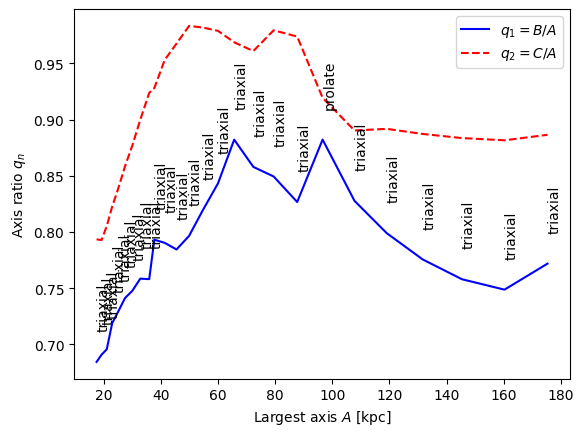

In [ ]:
# plot axis ratios along with determined morphologies

fig, ax = plt.subplots()

# axes largest to smallest are A,B, C

# get "3D" average binsize conversion?
binsize_3D = np.sqrt(xz_binsize**2 + xy_binsize**2 + yz_binsize**2)

# q1 = B/A
ax.plot(sma3D_arr*binsize_3D, axis_ratios[:,0], c='b',
        label=r'$q_1 = B/A$')
# q2 = C/A
ax.plot(sma3D_arr*binsize_3D, axis_ratios[:,1], c='r',
        linestyle='--', label=r'$q_2 = C/A$')

ax.set_xlabel(r"Largest axis $A$ [kpc]")
ax.set_ylabel(r'Axis ratio $q_n$')

for i in range(n):
    ax.annotate(shapes[i], (sma3D_arr[i]*binsize_3D, axis_ratios[i,0]+0.03),
                rotation='vertical')

ax.legend()
# NOTE: come up with a better visualization of this. Maybe a horizontal line or something

In [ ]:
# got pretty consistently triaxial, but close to prolate/spherical-ish towards the middle.
# makes sense that it's not oblate, at least

In [ ]:
# NOTE: change font to serif so it looks prettier

In [ ]:
# these are all leftover functions from the least squares fitting attempt
# keeping for now just in case

In [162]:
# def get_main_contour_points(contours):

#     main_con_segs = []

#     for i in range(len(contours.allsegs)):
#         contour = contours.allsegs[i]
#         main_con = []
#         for j in range(len(contour)):
#             main_con += list(contour[j])
#         main_con = np.array(main_con)
#         main_con_segs.append(main_con)
    
#     return main_con_segs

In [163]:
# def contour_ellipse_fits(contour_points):

#     ncontours = len(contour_points)
#     ellipses_params = np.zeros((ncontours, 5))

#     for i in range(ncontours):
#         if len(contour_points[i]) > 0:
#             pos = contour_points[i].T
#             ellipses_params[i] = fit_ellipse(pos[0], pos[1])
#         else:
#             ellipses_params[i] = np.zeros(5)
    
#     return ellipses_params

In [164]:
# def plot_ellipse_fits(ellipse_params, ax, colors, **kwargs):

#     ell_x_arr = np.linspace(-1000, 1000, 1000)
#     ell_y_arr = np.linspace(-1000, 1000, 1000)
#     ell_x, ell_y = np.meshgrid(ell_x_arr, ell_y_arr)

#     n = len(ellipse_params)

#     for i in range(n):
#         # a, b, x0, y0, theta
#         ellipse = ellipse_params[i]
#         X = ell_x - ellipse[2]
#         Y = ell_y - ellipse[3]
#         costheta = np.cos(ellipse[4])
#         sintheta = np.sin(ellipse[4])
#         a = ellipse[0]
#         b = ellipse[1]

#         ell_z = (X*costheta + Y*sintheta)**2/a**2 + (X*sintheta - Y*costheta)**2/b**2

#         ax.contour(ell_x, ell_y, ell_z, levels=[1], colors=colors[i], **kwargs)    